# One-vs-all Classification with Logisitic Regression

Week4のMulti-class Classificationの課題について

In [1]:
import math, random
import numpy as np
import scipy.io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import sys, os
sys.path.append(os.path.dirname('../common/'))
from common import *

default_figsize = plt.rcParams['figure.figsize']

## Dataset

In [2]:
dataset = scipy.io.loadmat('ex3data1.mat')
xs = dataset['X'].tolist()
ys = dataset['y'].ravel().tolist()
ys = [0 if y == 10 else y for y in ys]

train_frame = pd.DataFrame(data={'image':xs, 'label':ys})

ixs = sorted(np.random.randint(0, len(train_frame['label']), 20))
train_frame.take(ixs)

,image,label
277,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
535,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
696,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
906,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
1001,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
1005,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
1007,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
1598,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
1600,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
2122,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4


## Visualizing the data

In [3]:
def display_data(images, labels):
    m = len(labels)
    rows = math.floor(math.sqrt(m))
    columns = math.ceil(m / rows)

    fig = plt.figure()
    fig.subplots_adjust(hspace=0.7)

    for row in range(rows):
        for col in range(columns):
            index = row * columns + col
            ax = fig.add_subplot(rows, columns, index+1)
            ax.axis('off')
            ax.set_title(labels[index])
            ax.imshow(np.array(images[index]).reshape(20,20).T,
                      cmap=plt.get_cmap('gray'))

saved assets/week04_dataset.png


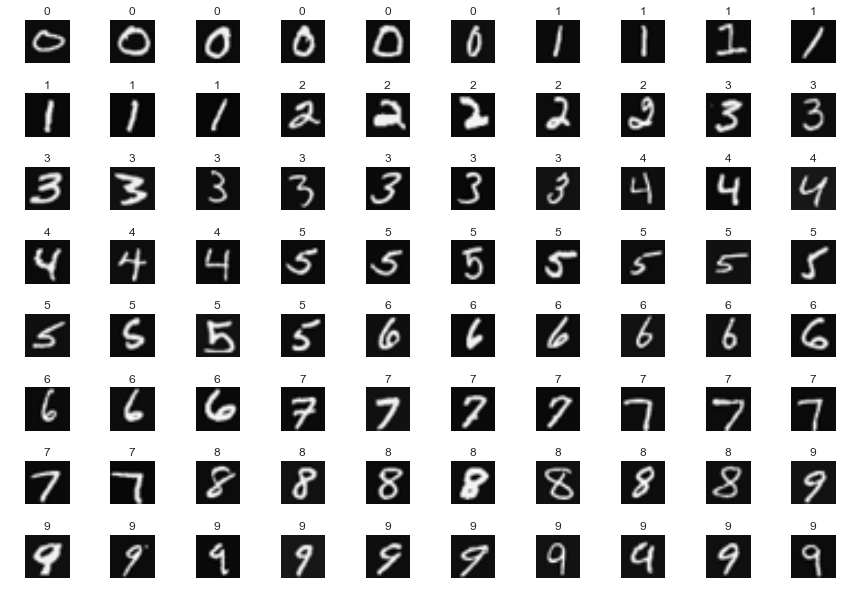

In [4]:
ixs = sorted(np.random.randint(0, len(train_frame['label']), 80))
rand_frame = train_frame.take(ixs)
images = rand_frame['image'].values
labels = rand_frame['label'].values

plt.rcParams['figure.figsize'] = (15, 10)
display_data(images, labels)
savefig('week04_dataset.png')

## Classification

In [5]:
%run 'lr_classifier.py'

In [6]:
X = np.array(train_frame['image'].values.tolist())
y = np.array(train_frame['label'].values.tolist()).reshape(-1, 1)

thetas, J_history = optimize_params(X, y, 10, 0.1)

... training : label=0 J=0.0176975150701
... training : label=1 J=0.0248629712402
... training : label=2 J=0.0693398270257
... training : label=3 J=0.0725531401349
... training : label=4 J=0.0512103972198
... training : label=5 J=0.0774043411784
... training : label=6 J=0.0336919652133
... training : label=7 J=0.0461226952037
... training : label=8 J=0.0941572604235
... training : label=9 J=0.0888868570956


saved assets/week03_lr_reg_cost_history.png


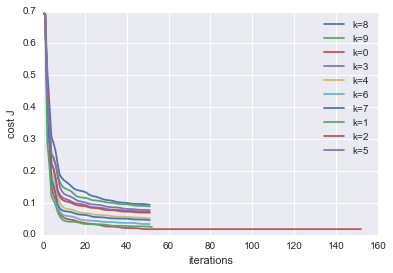

In [7]:
plt.rcParams['figure.figsize'] = default_figsize

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for label, j in J_history.items():
    ax.plot(j, label='k='+label)
ax.legend()
ax.set_xlabel('iterations')
ax.set_ylabel('cost J')
savefig('week03_lr_reg_cost_history.png')

## Prediction

In [8]:
preds = predict(thetas, X)
pred_classes = np.array([p['class'] for p in preds]).reshape(-1, 1)
compute_train_accuracy(pred_classes, y)

93.280000000000001

## Visualize prediction errors

In [9]:
corrects = np.where(pred_classes.ravel() == y.ravel())[0]
mistakes = np.where(pred_classes.ravel() != y.ravel())[0]

saved assets/week04_lr_mistakes.png


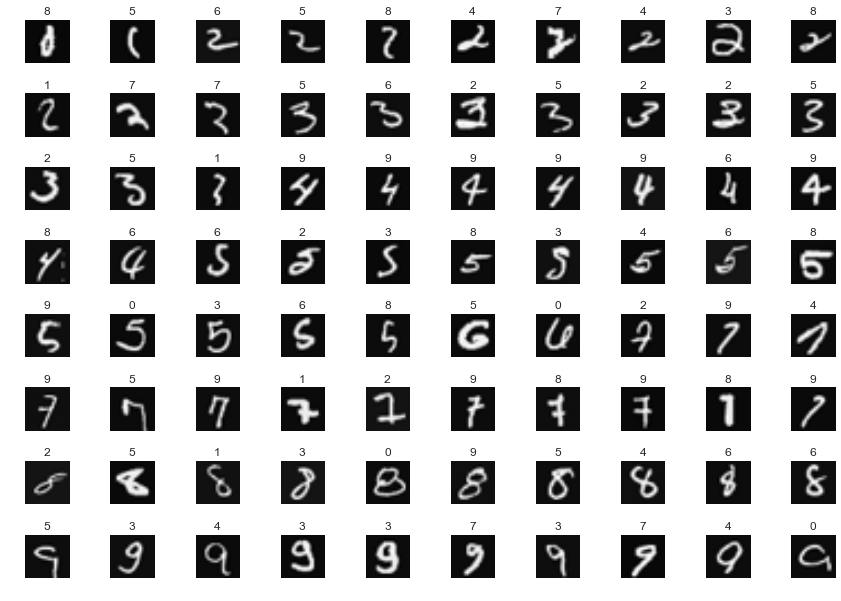

In [10]:
ixs = sorted(np.random.permutation(mistakes)[0:80])
mistake_frame = train_frame.take(ixs)
images = mistake_frame['image'].values
labels = pred_classes[ixs].ravel().tolist()

plt.rcParams['figure.figsize'] = (15, 10)
display_data(images, labels)
savefig('week04_lr_mistakes.png')

saved assets/week04_lr_pred_hist.png


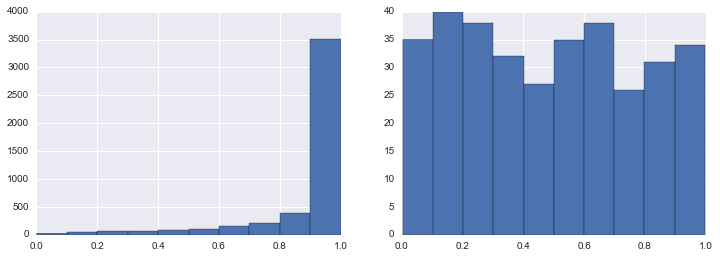

In [11]:
pred_frame = pd.DataFrame(data=preds)

plt.rcParams['figure.figsize'] = (12, 4)
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.hist(pred_frame.ix[corrects].value)
ax = fig.add_subplot(1,2,2)
ax.hist(pred_frame.ix[mistakes].value)
savefig('week04_lr_pred_hist.png')